* An end-to-end scikit learn workflow
* getting the data ready
* Choose the right estimator/algorithm for our problems
* fit the model/algorithm and use it to make predictions on our data
* evaluating a model
* improve a model
* save and load a trained model
* putting it all together

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#create X (feature matrix)
X=heart_disease.drop("target",axis=1)

#create y (labels)
y=heart_disease["target"]

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
#2.choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#3. fit the model to the trainig data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
#make a prediction
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [10]:
y_test

243    0
141    1
300    0
275    0
81     1
      ..
212    0
185    0
42     1
117    1
2      1
Name: target, Length: 61, dtype: int64

In [11]:
#4. Evaluate the model on the training data and test data
clf.score(X_train,y_train)


1.0

In [12]:
clf.score(X_test,y_test)

0.8032786885245902

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.83      0.80        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [14]:
confusion_matrix(y_test,y_pred)

array([[25,  7],
       [ 5, 24]], dtype=int64)

In [15]:
accuracy_score(y_test,y_pred) #43/(43+18)

0.8032786885245902

In [16]:
#5. improve a model
#try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}")
    print("")


Trying model with 10 estimators...
Model accuracy on test set: 80.33

Trying model with 20 estimators...
Model accuracy on test set: 83.61

Trying model with 30 estimators...
Model accuracy on test set: 81.97

Trying model with 40 estimators...
Model accuracy on test set: 77.05

Trying model with 50 estimators...
Model accuracy on test set: 83.61

Trying model with 60 estimators...
Model accuracy on test set: 81.97

Trying model with 70 estimators...
Model accuracy on test set: 81.97

Trying model with 80 estimators...
Model accuracy on test set: 85.25

Trying model with 90 estimators...
Model accuracy on test set: 75.41



In [17]:
#6.save a model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pk1","wb"))

In [18]:
loaded_model=pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test,y_test)

0.7540983606557377

## 1.getting our data ready to be used with machine learning

three main things we have to do:
    1.Split the data into features and labels (usually "X" & "y")
    2.Filling (also called imputing) or disregarding missing values
    3.converting non=numerical values to numerical values (also called feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X=heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [24]:
X.shape

(303, 13)

In [25]:
len(heart_disease)

303

In [26]:
X.shape[0]*0.7

212.1

## Make sure its all numerical

In [27]:
car_sales=pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
len(car_sales)

1000

In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [31]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#split into training and test
X_train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [34]:
car_sales["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [35]:
car_sales["Colour"].value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [36]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [37]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [38]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [39]:
#car_sales.duplicated().value_counts()

In [40]:
car_sales["Doors"]=car_sales["Doors"].astype(object)
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [41]:
# The categorical categories are now either 1 or 0...
X["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [42]:
#lets's refit the model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
model.score(X_test,y_test)

0.3235867221569877

## what if there were missing values ?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether


In [44]:
#import car sales missing data
df=pd.read_csv("car-sales-extended-missing-data.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [45]:
df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
#create x &y
X=df.drop("Price",axis=1)
y=df["Price"]

In [47]:
#let's try an convert our data to numbers
#turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### option 1: Fill missing data with pandas

In [49]:
df["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [50]:
## Fill the "Make" column
df["Make"].fillna("missing",inplace=True)

#fill the "Colour" column
df["Colour"].fillna("missing",inplace=True)

#fill the "Odometer (KM)" column
df["Odometer (KM)"].fillna(df["Odometer (KM)"].mean(),inplace=True)

#Fill the "Doors" column
df["Doors"].fillna(4,inplace=True)

In [51]:
#check our dataframe again
df.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [52]:
#Remove rows with missing Price value
df.dropna(inplace=True)

In [53]:
df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [54]:
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
len(df)

950

In [56]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [57]:
#let's try an convert our data to numbers
#turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(df)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [58]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2:Fill missing values with Scikit-Learn

In [59]:
df=pd.read_csv("car-sales-extended-missing-data.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [60]:
#df.duplicated().sum()

In [61]:
df.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [62]:
#drop the rows with no labels
df.dropna(subset=["Price"],inplace=True)
df.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
#split into X & y
X=df.drop("Price",axis=1)
y=df["Price"]

In [64]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [65]:
#Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with  "missing" & numerical values with mean
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")  #kategorikelerlde strateji sabitse(constant) doldur.
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean") #sayısal sütüunlar için

#define columns
cat_features=["Make","Colour"]
door_feature=["Doors"]
num_features=["Odometer (KM)"]

#create  an imputer (something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_feature),
    ("num_imputer",num_imputer,num_features)
])

#Transform the data
filled_X=imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [66]:
df_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
df_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [67]:
df_filled.isnull().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [68]:
#let's try an convert our data to numbers
#turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(df_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [69]:
# Now we've got our data as numbers and filled (no missing values)
#let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

In [70]:
len(df_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem
* Sklearn refers to machine learning models,algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
* Sometimes you'll see "clf" (short for classifier) used as a classifiaction estimator
* Regression problem - predicting a number (selling price of a car)

### 2.1 Picking a machine learning model for a regression problem

In [71]:
#get california housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [72]:
df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [73]:
df["target"]=housing["target"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [74]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
#import algorithm/estimator
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
X=df.drop("target",axis=1)
y=df["target"] #median hpuse price in $100,000s

#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model=Ridge()
model.fit(X_train,y_train)

#check the score of the model (on the test set)
model.score(X_test,y_test)

0.5758549611440126

what if "ridge" didn't work or the score didn't fit our needs ?

* well,we could always try a different model
* how about we try an ensemble model (an ensemble is combinaiton of smaller models to try and make better predictions than just a single model)

In [77]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
X=df.drop("target",axis=1)
y=df["target"]

#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create Random Forest model
model=RandomForestRegressor()
model.fit(X_train,y_train)

#create the score of the model (on the test set)
model.score(X_test,y_test)

0.8057655811971304

In [78]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6224711957449394

## Picking a machine learning model for a classification problem

Let's go to the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [79]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
len(df)

303

Consulting the map and it says to try LinearSVC

In [81]:
# Import the LinearSVC estimato class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#make the data
X=df.drop("target",axis=1)
y=df["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

# Evaluate the LinearSVC
clf.score(X_test,y_test)

C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [82]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [83]:
# Import the LinearSVC estimato class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
X=df.drop("target",axis=1)
y=df["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test,y_test)

0.8524590163934426

* if you have structured data,used ensemble methods
*if you have unstructured data, use deep learning or transfer learning

In [84]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. fit the model/algorithm and use it to make predictions on our data

## 3.1 Fitting the model to the data

Different names for:
* X=features, features variables, data
* y=labels, targets, target variables

In [85]:
# Import the LinearSVC estimato class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#make the data
X=df.drop("target",axis=1)
y=df["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Random Forest Classifier
clf=RandomForestClassifier()

#fit the model to the data (training the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

In [86]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 make predictions using a machine learning model

2 ways to make predictions:
* predict()
* predict_proba()

In [88]:
# Use a train model to make predictions
### clf.predict(np.array([1,7,8,3,4])) #this doesn't work

In [89]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [90]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
# Compare predictions to truth labels to evaluate the model
y_pred=clf.predict(X_test)
np.mean(y_pred == y_test) #doğruluk

0.8524590163934426

In [93]:
clf.score(X_test,y_test) #doğruluk

0.8524590163934426

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) #doğruluk

0.8524590163934426

In [95]:
#  predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [96]:
# Let's predict() on the same data
clf.predict(X_test[:5])


array([0, 1, 1, 0, 1], dtype=int64)

predict() can also be used for regression models

In [97]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [98]:
housing_df["target"]=housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#split into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create model instance
model=RandomForestRegressor()

#fit the model to the data
model.fit(X_train,y_train)

#make predictions
y_pred=model.predict(X_test)

In [100]:
y_pred[:10]

array([0.4943   , 0.7642   , 4.9346864, 2.56113  , 2.29764  , 1.6625701,
       2.34127  , 1.66352  , 2.48233  , 4.843458 ])

In [101]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [102]:
len(y_pred)

4128

In [103]:
len(y_test)

4128

In [104]:
#compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.3267155795542638

## 4. Evaluating a machine learning model
* Estimator's built-in score() method
* The scoring parameter
* problem specific metric functions

* url:https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the "score" method

In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#create x & y
X=df.drop("target",axis=1)
y=df["target"]

# create train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#create classifier model instance
clf=RandomForestClassifier()

#fit classifier to training data
clf.fit(X_train,y_train)

#evaluating the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

Let's use the score() on our regression problem

In [106]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

#the default score() evaluation metric is r_squared for regression algorithms 
#Highest=1.0, lowest=0.0 
model.score(X_test,y_test)

0.8057655811971304

### 4.2 Evaluating a model using the scoring parameter

In [107]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [108]:
clf.score(X_test,y_test)

0.8524590163934426

In [109]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [110]:
np.random.seed(42)

#single training and test split score
clf_single_score=clf.score(X_test,y_test)

#Take tahe mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

#compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [111]:
#Default scoring parameter of classifier = mean accuracy

In [112]:
# Scoring parameter set to None by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under Roc Curve
3. Confusion matrix
4. Classification report


**Accuracy**

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=df.drop("target",axis=1)
y=df["target"]

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)


In [115]:
np.mean(cross_val_score)

0.8248087431693989

In [116]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

Roc curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = mdoel preidcts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [117]:
#Create X_test...
X_train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [118]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train,y_train)

#make predictions with probabilities
y_probs=clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.9 , 0.1 ],
        [0.74, 0.26],
        [0.4 , 0.6 ],
        [0.95, 0.05],
        [0.07, 0.93],
        [0.03, 0.97],
        [0.08, 0.92],
        [0.99, 0.01],
        [0.92, 0.08],
        [0.14, 0.86]]),
 61)

In [119]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.1 , 0.26, 0.6 , 0.05, 0.93, 0.97, 0.92, 0.01, 0.08, 0.86])

In [120]:
# calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.06896552, 0.06896552, 0.13793103, 0.20689655,
       0.20689655, 0.24137931, 0.27586207, 0.31034483, 0.37931034,
       0.4137931 , 0.44827586, 0.44827586, 0.44827586, 0.44827586,
       0.55172414, 0.55172414, 0.5862069 , 0.5862069 , 0.62068966,
       0.65517241, 0.72413793, 0.79310345, 0.79310345, 0.82758621,
       0.89655172, 0.93103448, 1.        ])

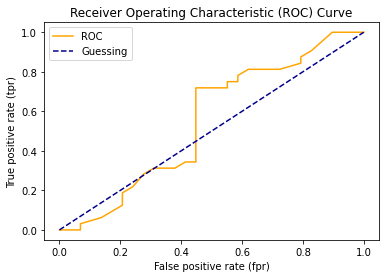

In [121]:
#create a function for plottin ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model
    """
    #plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)  

In [122]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.5490301724137931

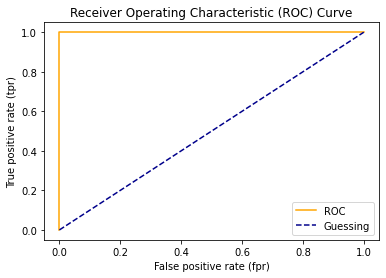

In [123]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)  

In [124]:
#perfect Auc score
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix.

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [125]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[16, 13],
       [14, 18]], dtype=int64)

In [126]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,16,13
1,14,18


In [127]:
25+28+4+4

61

In [128]:
len(y_preds)

61

#How install a conda package from a Jupyter Notebook
* import sys
* !conda install --yes --prefix {sys.prefix} seaborn

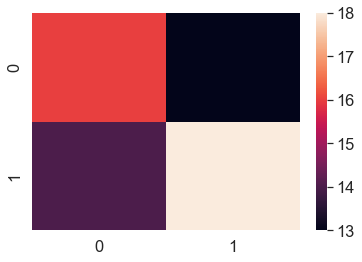

In [129]:
# make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

#set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using Seaborn
sns.heatmap(conf_mat);


In [130]:
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

**Classification Report**

In [131]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54        29
           1       0.58      0.56      0.57        32

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.56      0.56      0.56        61



Each term measures something slightly different:

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).


In [132]:
#örn: 10.000 kişi var ve kimin hasta oldugunu tahmin etmek için model kurucaz.
# where precision and recall become valuable
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case
disease_true

disease_preds=np.zeros(10000) #model predicts every case as 0
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ege_s\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression Model Evaluation metrics

url: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

THe ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [133]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [135]:
model.score(X_test,y_test)

0.5106393318965518

In [136]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [137]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [138]:
from sklearn.metrics import r2_score

#fill an aray with y_test mean
y_test_mean=np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016,
       0.52459016, 0.52459016, 0.52459016, 0.52459016, 0.52459016])

In [139]:
len(y_test)

61

In [140]:
len(y_test_mean)

61

In [141]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets.Values can range from negative infinity(a very poor model) to 1.For example,if all your model does is predict the mean of the targets, it's R^2 value would be 0. And şf your model perfectly predicts a range of numbers it's R^2 value would be 1.

**Mean absolute erro (MAE)**

MAE is the average of the absolute differences between predictions and actual values.
It gives you an idea of how wrong your models predictions are


In [142]:
#MAE

from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mae

0.23754098360655734

In [143]:
y_pred

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [144]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [145]:
df2=pd.DataFrame(data={"actual values":y_test,
                      "predicted values":y_pred})

df2["differences"]=df2["predicted values"]- df2["actual values"]
df2.head(10)

,actual values,predicted values,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
9,1,0.86,-0.14
119,1,0.73,-0.27
223,0,0.03,0.03
268,0,0.01,0.01
33,1,0.45,-0.55


In [146]:
# MAE using formulas and differences
np.abs(df2["differences"]).mean()

0.23754098360655726

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [147]:
# Mean squared error

from sklearn.metrics import mean_squared_error

y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mse

0.12204426229508197

In [148]:
df2["squared_differences"]=np.square(df2["differences"])
df2.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [149]:
df_large_error=df2.copy()
df_large_error.iloc[0]["squared_differences"]=16

C:\Users\ege_s\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [150]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [151]:
#calculate MSE with large eroor
df_large_error["squared_differences"].mean()

0.12204426229508196

In [152]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared_differences
179,0,0.03,0.03,0.0009
228,20,20.00,20.00,20.0000
111,20,20.00,20.00,20.0000
246,20,20.00,20.00,20.0000
60,20,20.00,20.00,20.0000
...,...,...,...,...
249,20,20.00,20.00,20.0000
104,20,20.00,20.00,20.0000
300,20,20.00,20.00,20.0000
193,20,20.00,20.00,20.0000


In [153]:
df_large_error["squared_differences"].mean()

19.672145901639343

### 4.2.3 Finally using the scoring parameter

In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=df.drop("target",axis=1)
y=df["target"]

clf=RandomForestClassifier()

In [155]:
np.random.seed(42)

#cross-validation accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None) #if scoring=None, estimator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [156]:
#cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [157]:
np.random.seed(42)

cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [158]:
#cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [159]:
#Precision
np.random.seed(42)

cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [160]:
#cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [161]:
# Recall
np.random.seed(42)

cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [162]:
#cross_validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the scoring parameter being using for a regression problem...

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor()

In [164]:
np.random.seed(42)

cv_r2=cross_val_score(model,X,y,cv=3,scoring=None) #if scoring=None, estimator's default scoring evaulation metric is used (r2 for regression models)
np.mean(cv_r2)

0.6538316966195948

In [165]:
cv_r2

array([0.61884272, 0.72091799, 0.62173438])

In [166]:
# Mean squared error 
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.4318936663332149

In [167]:
cv_mse 
#negatift mse için 0 en iyi değer.
#Yani burada -0.52 en kötü performans gösteren, -0.34 en iyi performans gösteren degerdir.

array([-0.52902829, -0.34772991, -0.37447766, -0.44268167, -0.46555081])

In [168]:
#Mean absolute error
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.46639437723352717

In [169]:
cv_mae
#negatift mae için 0 en iyi değer.
#Yani burada -0.54 en kötü performans gösteren, -0.40 en iyi performans gösteren degerdir.

array([-0.54326366, -0.40998155, -0.43858668, -0.46628533, -0.47385467])

## 4.3 Using different evaluation metrics as scikit-learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module
url: https://scikit-learn.org/stable/modules/classes.html

In [170]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X & y
X=df.drop("target",axis=1)
y=df["target"]

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create model
clf=RandomForestClassifier()

#Fit model
clf.fit(X_train,y_train)


#Make predictions
y_pred=clf.predict(X_test)


#Evaluate model using evaluation fınction
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"precision: {precision_score(y_test,y_pred)}")
print(f"recall: {recall_score(y_test,y_pred)}")
print(f"f1_score: {f1_score(y_test,y_pred)}")


Classifier metrics on the test set
Accuracy: 85.25%
precision: 0.8484848484848485
recall: 0.875
f1_score: 0.8615384615384615


In [171]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X & y
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Create model
model=RandomForestRegressor()

#Fit model
model.fit(X_train,y_train)

#Make predictions
y_pred=model.predict(X_test)

#Evaluate model using evaluation fınction
print("Regression metrics on the test set")
print(f"r2: {r2_score(y_test,y_pred)}")
print(f"MAE: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE: {mean_squared_error(y_test,y_pred)}")


Regression metrics on the test set
r2: 0.8057655811971304
MAE: 0.3267155795542638
MSE: 0.25452652628268335


## 5. Improving a model

First predictions = baseline predictions. First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use ?
* Could we improve the current model ?

Hyperparameters vs Parameters

* Parameters = model find these patterns in data 
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [172]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [173]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try an adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [174]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [175]:
def evaluate_preds(y_true,y_pred):
    """
    performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    metric_dict={"accuracy":round(accuracy,2),
                "precision":round(precision,2),
                "recall":round(recall,2),
                "f1":round(recall,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")    
    print(f"recall: {recall:.2f}")    
    print(f"f1: {f1:.2f}")    
    
    return metric_dict

In [176]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
df_shuffled=df.sample(frac=1) #bütün verisetini karıstırdık.

#split into X & y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#split the data into train, validation & test sets
train_split=round(0.7*len(df_shuffled)) # %70 of data
valid_split=round(train_split+0.15*len(df_shuffled)) # %15 of data
X_train, y_train=X[:train_split],y[:train_split]
X_valid, y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test= X[valid_split:], y[:valid_split]

clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#make baseline predictions
y_preds=clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics



Acc: 82.22%
precision: 0.81
recall: 0.88
f1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.88}

In [177]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
precision: 0.84
recall: 0.84
f1: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10,100,200,500,1000,1200],
     "max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into X & y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10, # number of models to try (kombinasyon)
                         cv=5,
                         verbose=2
                         )

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [179]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [180]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics= evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [181]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [183]:
grid_2={'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]}

In [184]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

#split into X & y
X=df_shuffled.drop("target",axis=1)
y=df_shuffled["target"]

#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                         param_grid=grid_2,
                         cv=5,
                         verbose=2
                         )

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [185]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [186]:
gs_y_pred=gs_clf.predict(X_test)

#evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_pred)

Acc: 78.69%
precision: 0.74
recall: 0.82
f1: 0.78


let's compare our different models metrics

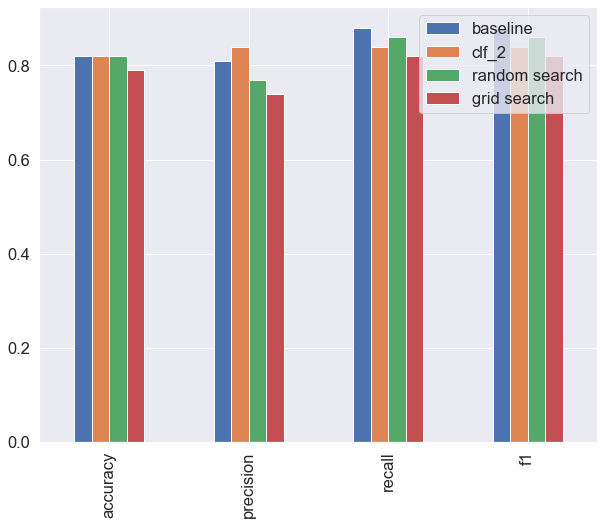

In [187]:
compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                             "random search":rs_metrics,
                             "grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

### 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
    1. With python's pickle module
    2. With the joblib module

**Pickle**    

In [188]:
import pickle

#Save an extisting model to file
pickle.dump(gs_clf,open("gs_random_forest_model_1.pk","wb"))

In [189]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pk","rb"))

In [190]:
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [191]:
# Make some predictions
pickle_y_pred=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_pred)

Acc: 78.69%
precision: 0.74
recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.82}

In [193]:
pickle.dump(rs_clf,open("rs_random_forest_model_1.pk","wb"))

In [194]:
load=pickle.load(open("rs_random_forest_model_1.pk","rb"))
load

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [195]:
pickle2_y_pred=load.predict(X_test)
evaluate_preds(y_test,pickle2_y_pred)

Acc: 81.97%
precision: 0.77
recall: 0.86
f1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.86}

**Joblib**

In [208]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [210]:
# Import a saved joblib model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib")

In [211]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 78.69%
precision: 0.74
recall: 0.82
f1: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.82}

In [ ]:
Acc: 78.69%
precision: 0.74
recall: 0.82
f1: 0.78

## 7. Putting it all together!

In [212]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [213]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [214]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell)
1. Fill missimg data
2. convert data to numbers
3. Build a model on the data

In [221]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setup random sees
import numpy as np
np.random.seed(42)

#Import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

#Define different features and transformer pipeline
cat_features=["Make","Colour"]
cat_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                ("onehot",OneHotEncoder(handle_unknown="ignore"))
                               ])

door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4)
    )])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer(transformers=[
    ("cat",cat_transformer,cat_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_features)])

# creating a  preprocessing and modellin pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])


#split data
X=data.drop("Price",axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

 It's also possible to use GridSearchCV or RandomizedSearchCV with our Pipeline

In [223]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"], #preprocessor değişkenime gitti,num a gitti,imputere gitti,strategy e baktı
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [224]:
gs_model.score(X_test,y_test)

0.3339554263158365

# Exercise

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [72]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [76]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [77]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
clf.score(X_train,y_train)

1.0

In [81]:
clf.score(X_test,y_test)

0.8524590163934426

In [82]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [83]:
example_dict={"RandomForestClassifier":RandomForestClassifier()}

models={"LinearSVC":LinearSVC,
       "KNN":KNeighborsClassifier,
       "SVC":SVC,
       "LogisticRegression":LogisticRegression,
       "RandomForestClassifier":RandomForestClassifier}

results={}

In [84]:
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

example_results 

{'RandomForestClassifier': 0.8688524590163934}

In [85]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results  

TypeError: fit() missing 1 required positional argument: 'y'

In [86]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

    
results  

TypeError: fit() missing 1 required positional argument: 'y'